#Libraries

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Load and check data

This dataset comes from Kaggle https://www.kaggle.com/datasets/balajivaraprasad/crimes-against-women-in-india-2001-2021?resource=download

"This data is collated from https://data.gov.in. It has state-wise data on the various crimes committed against women between 2001 to 2021. Some crimes that are included are Rape, Kidnapping and Abduction, Dowry Deaths etc."

In [277]:
df = pd.read_csv("/content/CrimesOnWomenData.csv")

In [278]:
df

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


Columns description:

0 - State->State

1 - Year->Year

2 - Rape->No. of Rape cases

3 - K&A->Kidnap And Assault

4 - DD->Dowry Deaths

5 - AoW->Assault against women

6 - AoM->Assault against modesty of women

7 - DV->Domestic violence

8 - WT->Women Trafficking



In [279]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [280]:
summary = df.describe()
palette = sns.color_palette("Paired", as_cmap=True)
summary.style.background_gradient(cmap=palette)

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [281]:
df.isna().sum()

,0
State,0
Year,0
Rape,0
K&A,0
DD,0
AoW,0
AoM,0
DV,0
WT,0


In [282]:
df.duplicated().sum()

0

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   736 non-null    object
 1   Year    736 non-null    int64 
 2   Rape    736 non-null    int64 
 3   K&A     736 non-null    int64 
 4   DD      736 non-null    int64 
 5   AoW     736 non-null    int64 
 6   AoM     736 non-null    int64 
 7   DV      736 non-null    int64 
 8   WT      736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 51.9+ KB


In [284]:
df["State"].value_counts()

,count
State,
Arunachal Pradesh,11
Karnataka,11
Mizoram,11
Meghalaya,11
Manipur,11
...,...
D & N HAVELI,10
DAMAN & DIU,10
LAKSHADWEEP,10


In [285]:
df['State'] = df['State'].str.upper()

In [286]:
df['State'] = df['State'].str.replace('D&N HAVELI', 'D & N HAVELI')

In [287]:
df['State'] = df['State'].str.replace('Delhi Ut','Delhi')

In [288]:
df["State"].value_counts()

,count
State,
ANDHRA PRADESH,21
UTTARAKHAND,21
PUNJAB,21
RAJASTHAN,21
SIKKIM,21
TAMIL NADU,21
TRIPURA,21
UTTAR PRADESH,21
WEST BENGAL,21


In [289]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')

# Exploratory Data Analysis

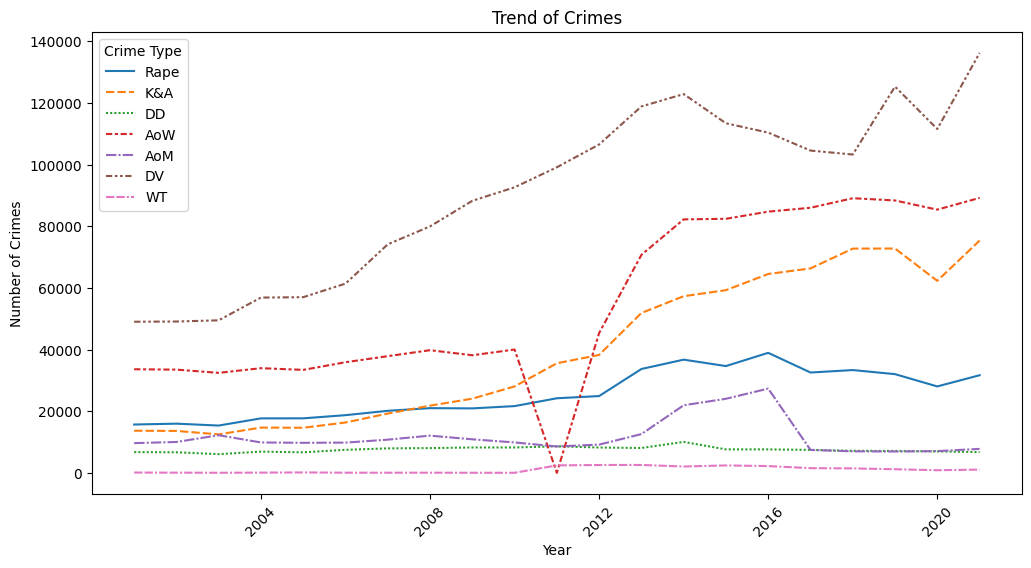

In [290]:
trend = df.groupby('Year').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend)
plt.title('Trend of Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.legend(title='Crime Type', loc='upper left')

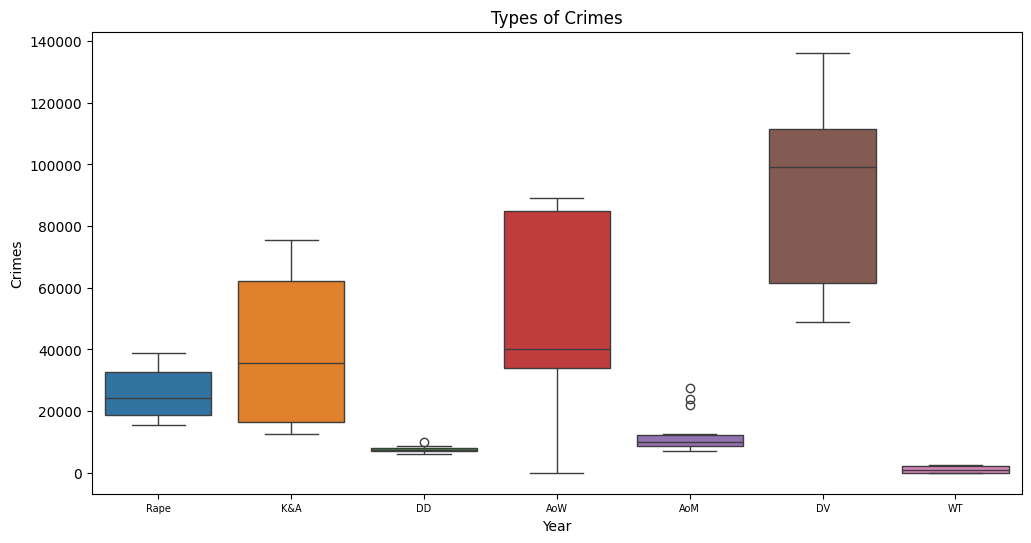

In [291]:
crimes = df.groupby('Year').sum()

plt.figure(figsize=(12, 6))
sns.boxplot(data=crimes)
plt.title('Types of Crimes')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.xticks(rotation=0, size = 7);

<ipython-input-292-8b1e39baa3d5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




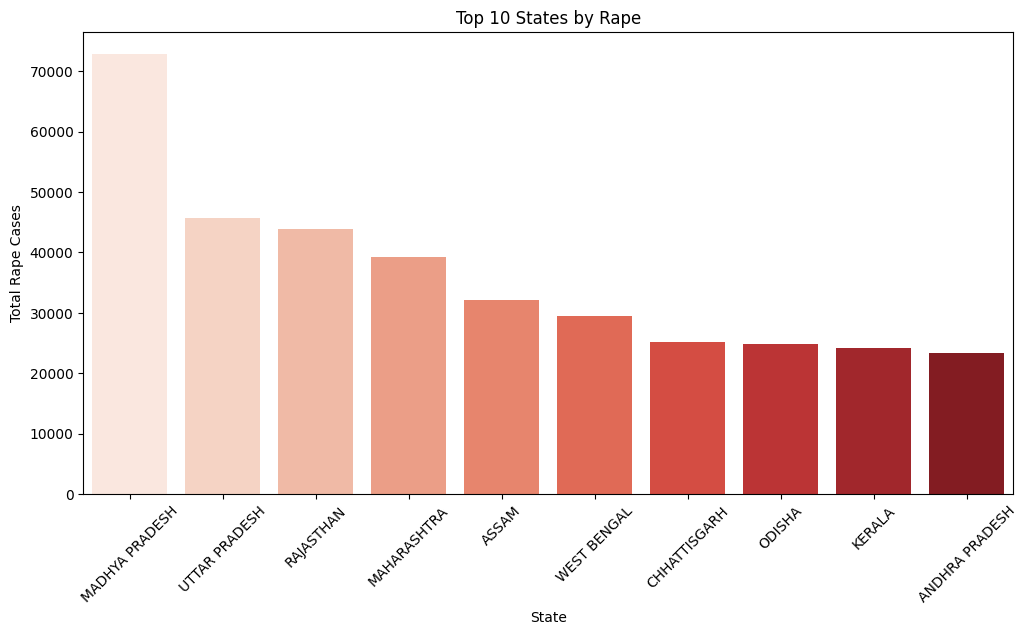

In [292]:
# Top states for a specific crime type
top_states = df.groupby('State')['Rape'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='Reds')
plt.title('Top 10 States by Rape')
plt.xlabel('State')
plt.ylabel('Total Rape Cases')
plt.xticks(rotation=45)
plt.show()

In [293]:
f = lambda x: sum(x[2:])
df['Total_crimes'] = (df.apply(f, axis = 1))

<ipython-input-294-9b83b3c21fb5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




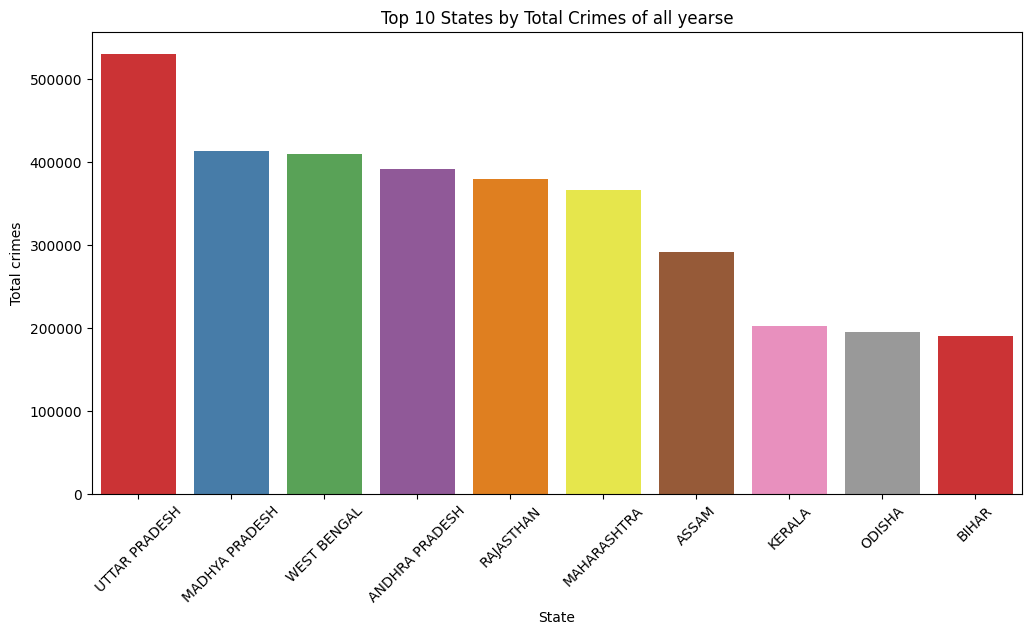

In [294]:
top_states = df.groupby('State')['Total_crimes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values, palette='Set1')
plt.title('Top 10 States by Total Crimes of all yearse')
plt.xlabel('State')
plt.ylabel('Total crimes')
plt.xticks(rotation=45)
plt.show()

#Correlation

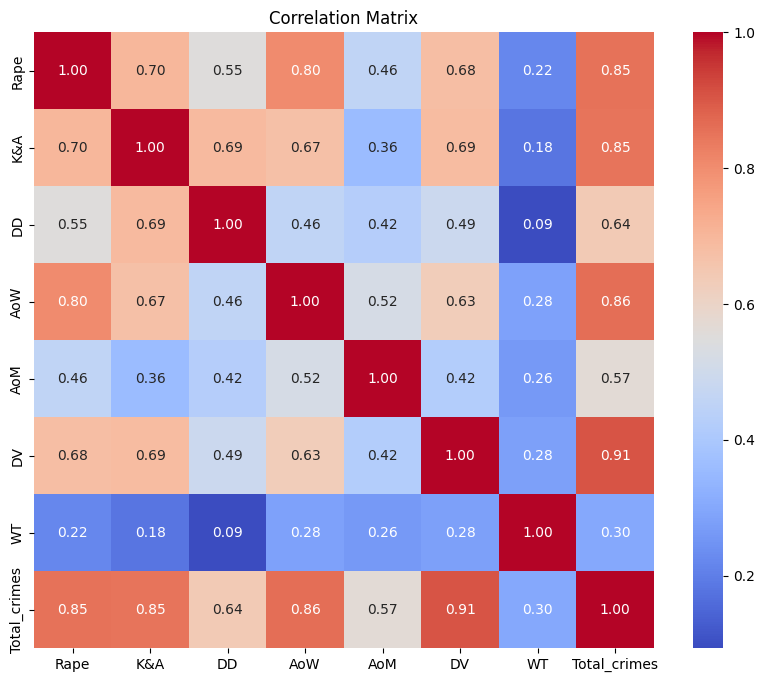

In [295]:
# Exclude the 'Year' and 'State' columns
correlation_matrix = df.drop(columns=['Year', 'State']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Encoder+Scaler

In [296]:
label_encoder = LabelEncoder()
df["State"] = label_encoder.fit_transform(df["State"])

In [297]:
df2=df.drop(columns=['Year','Total_crimes'], axis=1)

In [298]:
scaler = StandardScaler()
X = scaler.fit_transform(df2)

#Number of Clusters

##Elbow Method

In [299]:
sum_sqr_disctances = []

max_clusters = 30
for cluster_no in range(1, max_clusters+1):
    K_mean = KMeans(n_clusters=cluster_no)
    K_mean.fit(X)
    sum_sqr_disctances.append(K_mean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

In [300]:
sum_sqr_disctances

[5887.99999999999,
 3864.2489967470724,
 3314.074790234413,
 2861.3869899502583,
 2495.254874458226,
 2196.0828348675113,
 2004.617561647734,
 1830.4841440958337,
 1674.3163342769942,
 1516.0592922297858,
 1420.6244650910214,
 1264.4668237113433,
 1158.0680105069187,
 1069.9528953493084,
 993.7513987857287,
 940.8938946936314,
 880.9198054491513,
 852.9269656021783,
 787.3717334933731,
 739.2153495156937,
 723.2011687715102,
 681.9643337400707,
 652.0911607414831,
 623.9816130473798,
 592.1555800546267,
 574.1580085467901,
 543.5987614707649,
 527.0294250569331,
 509.3435670526459,
 491.90675819014746]

Text(0, 0.5, 'Sum of squared distances')

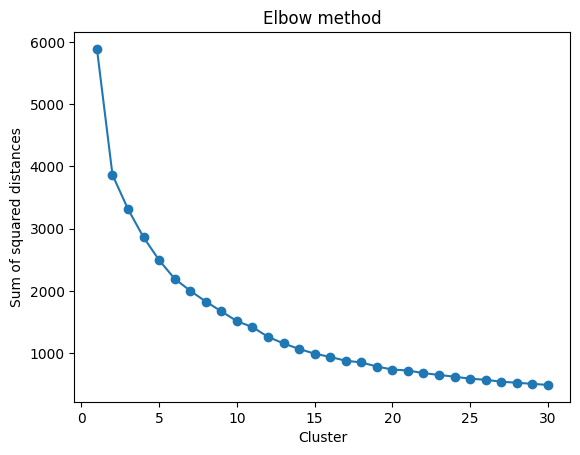

In [301]:
plt.plot(list(range(1, max_clusters+1)), sum_sqr_disctances, '-o')
plt.title('Elbow method')
plt.xlabel('Cluster')
plt.ylabel('Sum of squared distances')

##Dendrogram

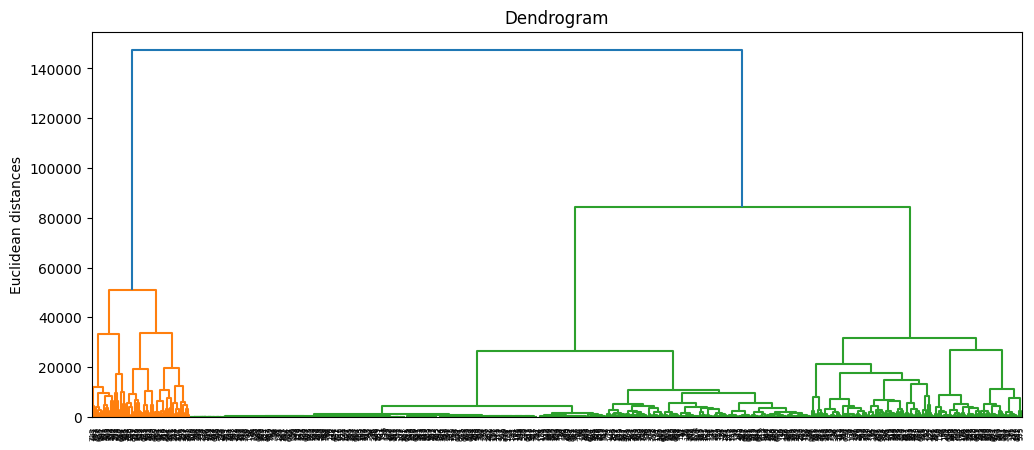

In [302]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df2, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

##Silhouette

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

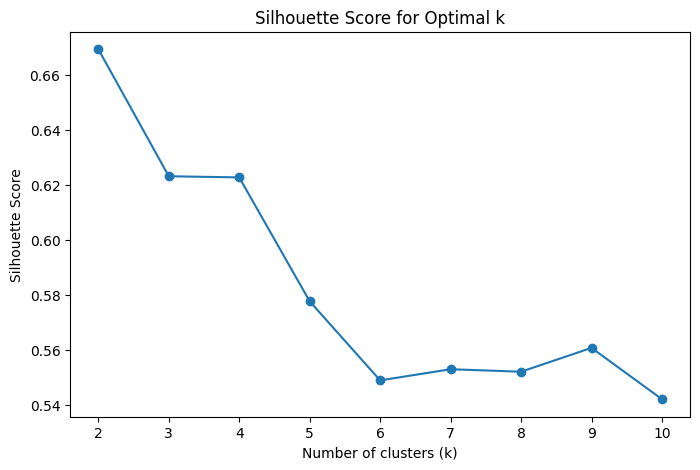

In [303]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    labels = kmeans.labels_
    score = silhouette_score(df2, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

#KMeans

In [304]:
K_mean = KMeans(n_clusters=2)

In [305]:
y_kmean = K_mean.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [306]:
y_kmean

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [307]:
df2['cluster']=y_kmean
df2

,State,Rape,K&A,DD,AoW,AoM,DV,WT,cluster
0,1,871,765,420,3544,2271,5791,7,1
1,2,33,55,0,78,3,11,0,0
2,3,817,1070,59,850,4,1248,0,0
3,4,888,518,859,562,21,1558,83,0
4,6,959,171,70,1763,161,840,0,0
...,...,...,...,...,...,...,...,...,...
731,7,1250,4083,141,2068,417,4731,4,0
732,8,315,904,16,1851,10,501,1,0
733,9,2,1,0,5,1,9,0,0
734,18,0,0,0,1,1,3,0,0


In [308]:
df2['PCA1']=X[:,0]
df2['PCA2']=X[:,1]
df2

,State,Rape,K&A,DD,AoW,AoM,DV,WT,cluster,PCA1,PCA2
0,1,871,765,420,3544,2271,5791,7,1,-1.585685,0.146610
1,2,33,55,0,78,3,11,0,0,-1.489186,-0.711679
2,3,817,1070,59,850,4,1248,0,0,-1.392686,0.091302
3,4,888,518,859,562,21,1558,83,0,-1.296187,0.164021
4,6,959,171,70,1763,161,840,0,0,-1.103188,0.236740
...,...,...,...,...,...,...,...,...,...,...,...
731,7,1250,4083,141,2068,417,4731,4,0,-1.006688,0.534786
732,8,315,904,16,1851,10,501,1,0,-0.910189,-0.422852
733,9,2,1,0,5,1,9,0,0,-0.813690,-0.743430
734,18,0,0,0,1,1,3,0,0,0.054805,-0.745478


Text(0, 0.5, 'PCA2')

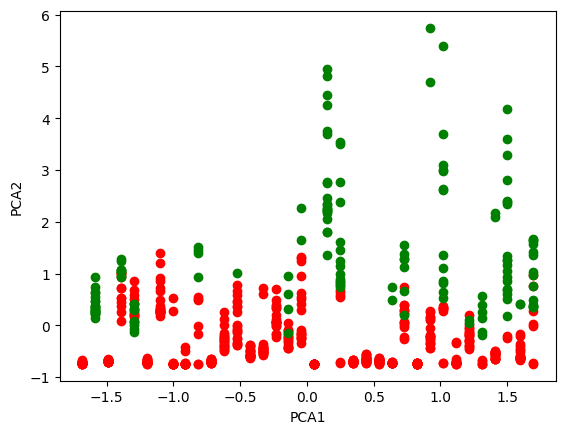

In [309]:
df0=df2[df2['cluster']==0]
df1=df2[df2['cluster']==1]

plt.scatter(df0.PCA1,df0["PCA2"],color='r')
plt.scatter(df1.PCA1,df1["PCA2"],color='g')

plt.xlabel("PCA1")
plt.ylabel("PCA2")

In [310]:
df2['cluster'].value_counts()

,count
cluster,
0,581
1,155


##Cluster analysis

In [314]:
cluster_desc = []

for cluster_no in range(2):
    print(f'Cluster {cluster_no}')
    desc = df2[df2['cluster'] == cluster_no].describe()
    print(desc)
    cluster_desc.append(desc)

Cluster 0
            State         Rape          K&A           DD          AoW  \
count  581.000000   581.000000   581.000000   581.000000   581.000000   
mean    16.807229   369.034423   451.106713    89.382100   654.734940   
std      9.802041   457.196576   696.053807   195.575399   994.317311   
min      0.000000     0.000000     0.000000     0.000000     0.000000   
25%      8.000000    20.000000    11.000000     0.000000    21.000000   
50%     16.000000   129.000000   119.000000     6.000000   119.000000   
75%     25.000000   573.000000   689.000000    99.000000   960.000000   
max     35.000000  2091.000000  4083.000000  1538.000000  5763.000000   

               AoM           DV          WT  cluster        PCA1        PCA2  
count   581.000000   581.000000  581.000000    581.0  581.000000  581.000000  
mean    110.760757  1016.356282   17.705680      0.0   -0.060296   -0.367509  
std     221.330599  1575.849672   66.309835      0.0    0.945891    0.468266  
min       0.0000

In [312]:
stat = 'mean'

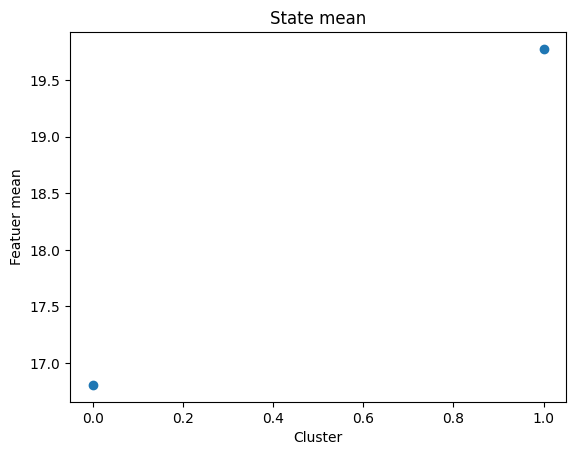

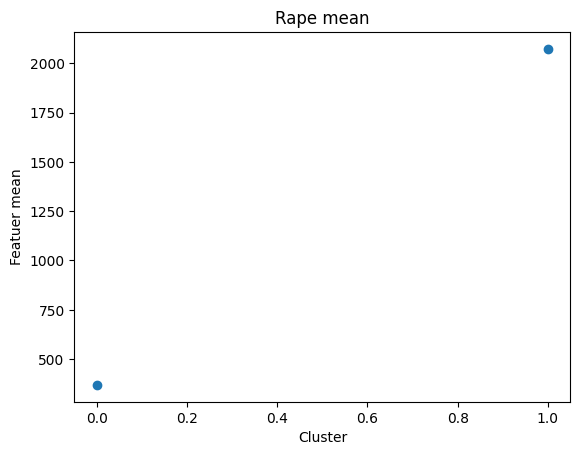

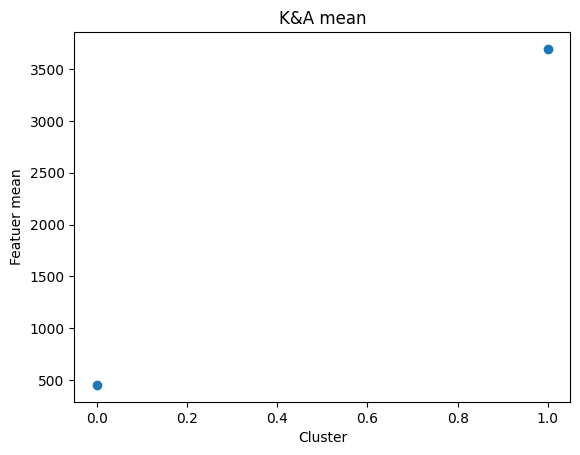

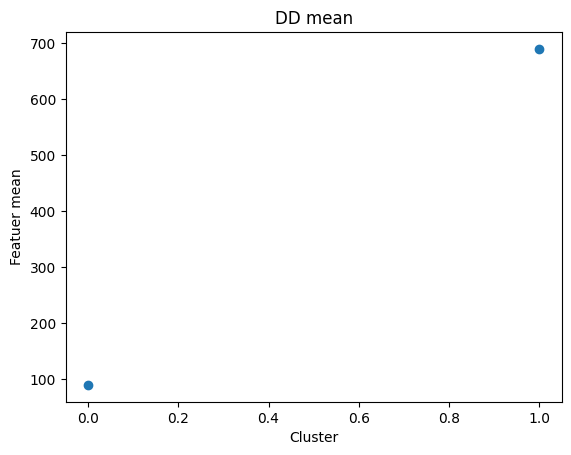

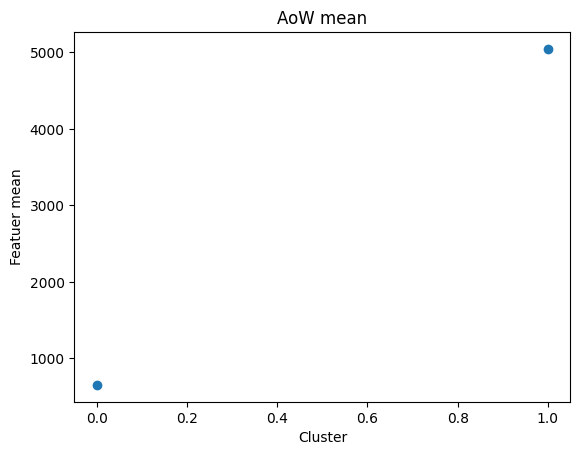

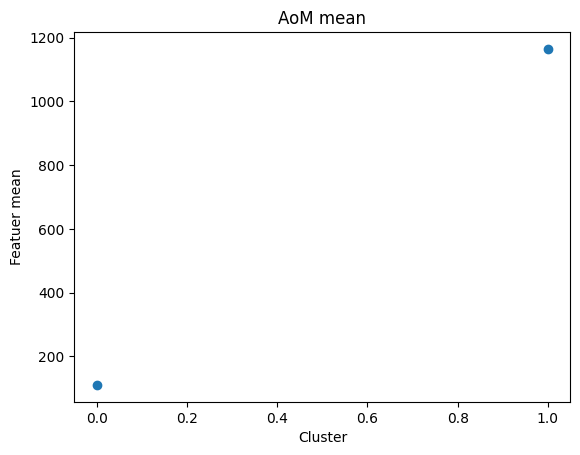

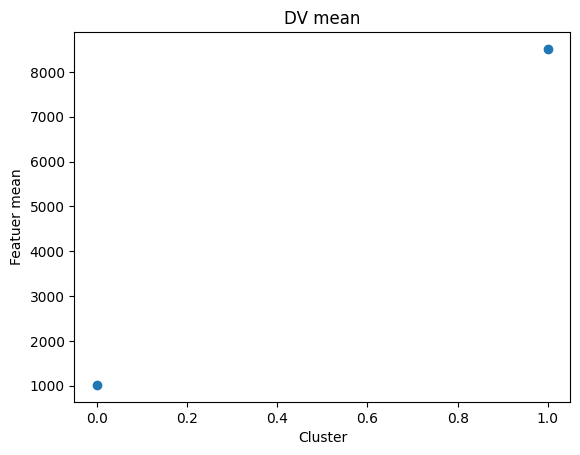

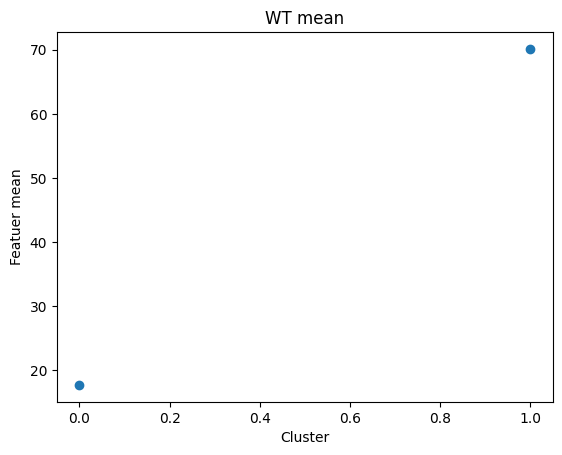

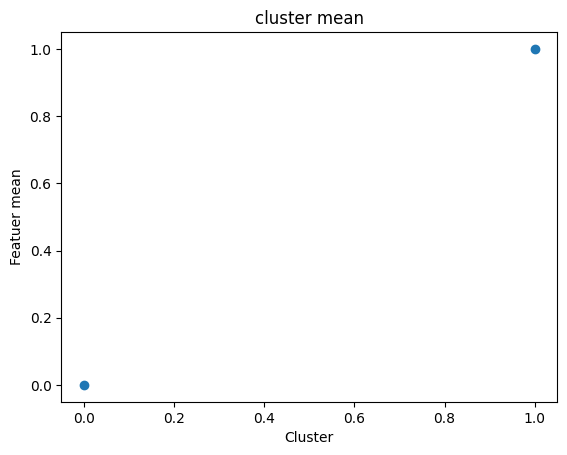

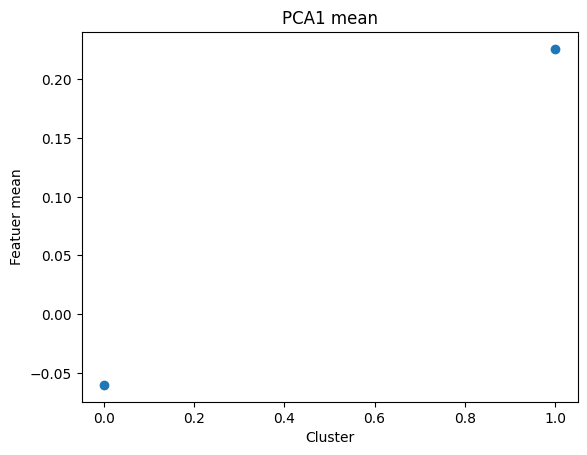

In [315]:
for column in df2.columns[:-1]:
    plt.figure()
    values = [cluster_description[column][stat] for cluster_description in cluster_desc]
    plt.scatter(list(range(len(values))), values)
    plt.title(column + ' ' + stat)
    plt.xlabel('Cluster')
    plt.ylabel('Featuer ' + stat)